In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import os
import sys
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras

print(sys.version_info)
for module in mpl,np, sklearn,pd,tf,keras:
    print(module.__name__,module.__version__)

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.16.4
sklearn 0.21.2
pandas 0.24.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 1    #,test_size = 0.25   default, 3:1
)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 2)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

用for循环来实现超参数搜索
缺点：1 实际中有很多参数， 需要很多层循环才能完成
    2  一次只能搜索一个参数， 无法并行


所以要用现有的sklearn库实现

In [8]:
# learning_rate: [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# W = W + grad * learning_rate

learnig_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories=[]
for lr in learnig_rates:

    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                          input_shape = x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer = keras.optimizers.SGD(lr)

    model.summary()
    model.compile(loss='mean_squared_error', optimizer='sgd')
    callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]
    history = model.fit(x_train_scaled, y_train,
                       validation_data = (x_valid_scaled, y_valid),
                       epochs = 100,
                       callbacks = callbacks)
    histories.append(history)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 178us/sample - loss: 2.5061 - val_loss: 1.1325
Epoch 2/100
11610/11610 [==============================] - 2s 137us/sample - loss: 0.8979 - val_loss: 0.7518
Epoch 3/100
11610/11610 [==============================] - 2s 136us/sample - loss: 0.7118 - val_loss: 0.6852
Epoch 4/100
11610/11610 [==============================] - 2s 144us/sample - loss: 0.6636 - val_loss: 0.6507
Epoch 5/100
11610/11610 [========

11610/11610 [==============================] - 2s 138us/sample - loss: 0.4151 - val_loss: 0.4182
Epoch 70/100
11610/11610 [==============================] - 2s 135us/sample - loss: 0.4145 - val_loss: 0.4174
Epoch 71/100
11610/11610 [==============================] - 2s 157us/sample - loss: 0.4139 - val_loss: 0.4166
Epoch 72/100
11610/11610 [==============================] - 2s 146us/sample - loss: 0.4131 - val_loss: 0.4160
Epoch 73/100
11610/11610 [==============================] - 2s 145us/sample - loss: 0.4127 - val_loss: 0.4155
Epoch 74/100
11610/11610 [==============================] - 2s 145us/sample - loss: 0.4119 - val_loss: 0.4150
Epoch 75/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.4111 - val_loss: 0.4146
Epoch 76/100
11610/11610 [==============================] - 2s 145us/sample - loss: 0.4107 - val_loss: 0.4136
Epoch 77/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.4096 - val_loss: 0.4129
Epoch 78/100
11610/1161

11610/11610 [==============================] - 2s 139us/sample - loss: 0.4433 - val_loss: 0.4455
Epoch 38/100
11610/11610 [==============================] - 2s 142us/sample - loss: 0.4424 - val_loss: 0.4448
Epoch 39/100
11610/11610 [==============================] - 2s 150us/sample - loss: 0.4415 - val_loss: 0.4437
Epoch 40/100
11610/11610 [==============================] - 2s 142us/sample - loss: 0.4405 - val_loss: 0.4431
Epoch 41/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.4397 - val_loss: 0.4421
Epoch 42/100
11610/11610 [==============================] - 2s 145us/sample - loss: 0.4387 - val_loss: 0.4416
Epoch 43/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.4380 - val_loss: 0.4409
Epoch 44/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.4373 - val_loss: 0.4400
Epoch 45/100
11610/11610 [==============================] - 2s 139us/sample - loss: 0.4365 - val_loss: 0.4393
Epoch 46/100
11610/1161

11610/11610 [==============================] - 2s 140us/sample - loss: 0.6453 - val_loss: 0.6333
Epoch 6/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.6205 - val_loss: 0.6114
Epoch 7/100
11610/11610 [==============================] - 2s 154us/sample - loss: 0.6001 - val_loss: 0.5938
Epoch 8/100
11610/11610 [==============================] - 2s 139us/sample - loss: 0.5835 - val_loss: 0.5780
Epoch 9/100
11610/11610 [==============================] - 2s 138us/sample - loss: 0.5693 - val_loss: 0.5648
Epoch 10/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.5572 - val_loss: 0.5541
Epoch 11/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.5467 - val_loss: 0.5439
Epoch 12/100
11610/11610 [==============================] - 2s 138us/sample - loss: 0.5377 - val_loss: 0.5352
Epoch 13/100
11610/11610 [==============================] - 2s 136us/sample - loss: 0.5301 - val_loss: 0.5275
Epoch 14/100
11610/11610 [=

11610/11610 [==============================] - 2s 148us/sample - loss: 0.4113 - val_loss: 0.4112
Epoch 80/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.4105 - val_loss: 0.4107
Epoch 81/100
11610/11610 [==============================] - 2s 144us/sample - loss: 0.4100 - val_loss: 0.4103
Epoch 82/100
11610/11610 [==============================] - 2s 136us/sample - loss: 0.4092 - val_loss: 0.4094
Epoch 83/100
11610/11610 [==============================] - 2s 143us/sample - loss: 0.4085 - val_loss: 0.4095
Epoch 84/100
11610/11610 [==============================] - 2s 156us/sample - loss: 0.4081 - val_loss: 0.4086
Epoch 85/100
11610/11610 [==============================] - 2s 150us/sample - loss: 0.4071 - val_loss: 0.4083
Epoch 86/100
11610/11610 [==============================] - 2s 146us/sample - loss: 0.4068 - val_loss: 0.4071
Epoch 87/100
11610/11610 [==============================] - 2s 145us/sample - loss: 0.4062 - val_loss: 0.4063
Epoch 88/100
11610/1161

11610/11610 [==============================] - 2s 131us/sample - loss: 0.4500 - val_loss: 0.4494
Epoch 48/100
11610/11610 [==============================] - 2s 134us/sample - loss: 0.4493 - val_loss: 0.4485
Epoch 49/100
11610/11610 [==============================] - 2s 133us/sample - loss: 0.4482 - val_loss: 0.4476
Epoch 50/100
11610/11610 [==============================] - 2s 134us/sample - loss: 0.4473 - val_loss: 0.4466
Epoch 51/100
11610/11610 [==============================] - 2s 132us/sample - loss: 0.4464 - val_loss: 0.4456
Epoch 52/100
11610/11610 [==============================] - 2s 148us/sample - loss: 0.4455 - val_loss: 0.4446
Epoch 53/100
11610/11610 [==============================] - 2s 138us/sample - loss: 0.4445 - val_loss: 0.4439
Epoch 54/100
11610/11610 [==============================] - 2s 136us/sample - loss: 0.4439 - val_loss: 0.4430
Epoch 55/100
11610/11610 [==============================] - 2s 135us/sample - loss: 0.4428 - val_loss: 0.4423
Epoch 56/100
11610/1161

11610/11610 [==============================] - 2s 135us/sample - loss: 0.5159 - val_loss: 0.5167
Epoch 16/100
11610/11610 [==============================] - 2s 135us/sample - loss: 0.5091 - val_loss: 0.5099
Epoch 17/100
11610/11610 [==============================] - 2s 135us/sample - loss: 0.5037 - val_loss: 0.5048
Epoch 18/100
11610/11610 [==============================] - 2s 135us/sample - loss: 0.4983 - val_loss: 0.4998
Epoch 19/100
11610/11610 [==============================] - 2s 139us/sample - loss: 0.4937 - val_loss: 0.4947
Epoch 20/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.4891 - val_loss: 0.4901
Epoch 21/100
11610/11610 [==============================] - 2s 142us/sample - loss: 0.4849 - val_loss: 0.4868
Epoch 22/100
11610/11610 [==============================] - 2s 137us/sample - loss: 0.4811 - val_loss: 0.4823
Epoch 23/100
11610/11610 [==============================] - 2s 142us/sample - loss: 0.4784 - val_loss: 0.4787
Epoch 24/100
11610/1161

11610/11610 [==============================] - 2s 137us/sample - loss: 0.4082 - val_loss: 0.4127
Epoch 90/100
11610/11610 [==============================] - 2s 136us/sample - loss: 0.4077 - val_loss: 0.4121
Epoch 91/100
11610/11610 [==============================] - 2s 134us/sample - loss: 0.4070 - val_loss: 0.4113
Epoch 92/100
11610/11610 [==============================] - 2s 134us/sample - loss: 0.4066 - val_loss: 0.4110
Epoch 93/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.4059 - val_loss: 0.4107
Epoch 94/100
11610/11610 [==============================] - 2s 134us/sample - loss: 0.4055 - val_loss: 0.4102
Epoch 95/100
11610/11610 [==============================] - 2s 132us/sample - loss: 0.4049 - val_loss: 0.4095
Epoch 96/100
11610/11610 [==============================] - 2s 135us/sample - loss: 0.4042 - val_loss: 0.4094
Epoch 97/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.4039 - val_loss: 0.4084
Epoch 98/100
11610/1161

11610/11610 [==============================] - 2s 135us/sample - loss: 0.4204 - val_loss: 0.4233
Epoch 58/100
11610/11610 [==============================] - 2s 134us/sample - loss: 0.4198 - val_loss: 0.4230
Epoch 59/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.4191 - val_loss: 0.4219
Epoch 60/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.4183 - val_loss: 0.4218
Epoch 61/100
11610/11610 [==============================] - 2s 134us/sample - loss: 0.4179 - val_loss: 0.4209
Epoch 62/100
11610/11610 [==============================] - 2s 134us/sample - loss: 0.4172 - val_loss: 0.4200
Epoch 63/100
11610/11610 [==============================] - 2s 143us/sample - loss: 0.4165 - val_loss: 0.4195
Epoch 64/100
11610/11610 [==============================] - 2s 138us/sample - loss: 0.4158 - val_loss: 0.4186
Epoch 65/100
11610/11610 [==============================] - 2s 135us/sample - loss: 0.4154 - val_loss: 0.4182
Epoch 66/100
11610/1161

Learning rate: 0.0001


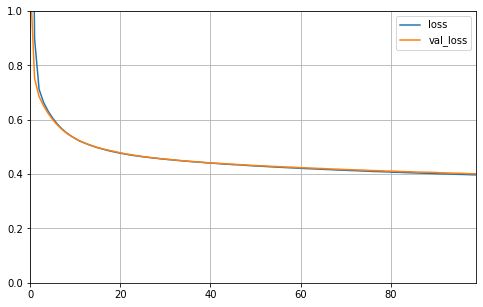

Learning rate: 0.0003


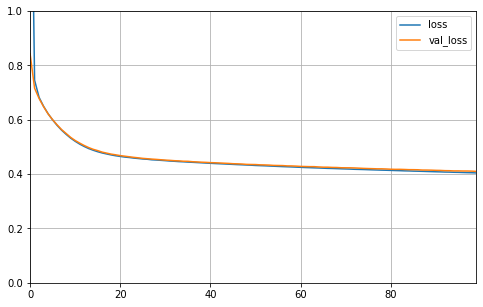

Learning rate: 0.001


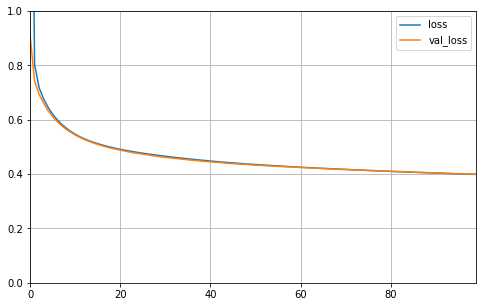

Learning rate: 0.003


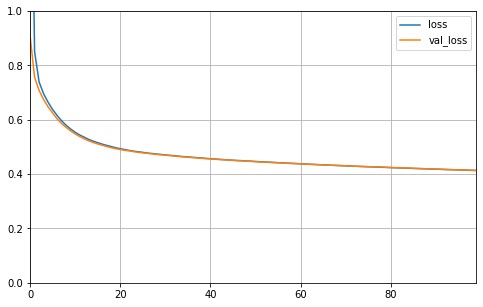

Learning rate: 0.01


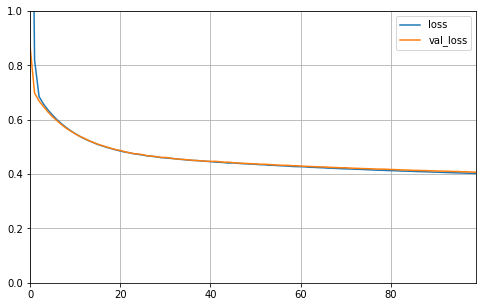

Learning rate: 0.03


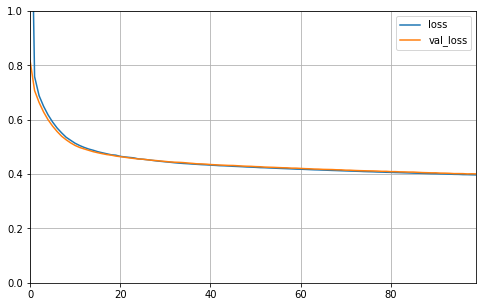

In [11]:
def plot_learnig_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
for lr, history in zip( learnig_rates, histories):
    print('Learning rate:',lr)
    plot_learnig_curves(history)